# Neural Net Example and comparison with SVM


### Setup

In [1]:
# A bit of setup
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Create data set

(-1.0, 1.0)

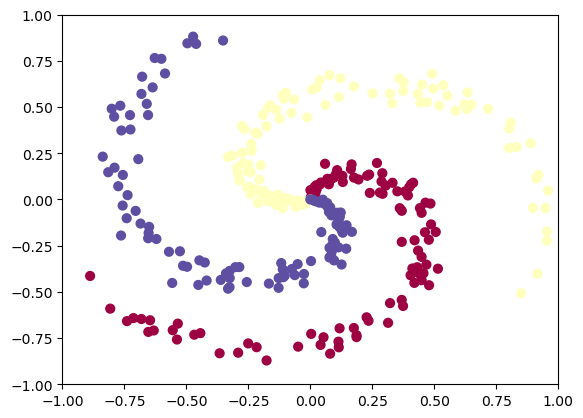

In [2]:
np.random.seed(0)

d = 2 # dimensionality
points_per_class = 100 # number of points per class
num_classes = 3 # number of classes

n = points_per_class*num_classes

X = np.zeros((n,d))
y = np.zeros(n, dtype='uint8')

for j in range(num_classes):

    inds = range(points_per_class*j, points_per_class*(j+1))

    # Generate radius and angle for each point
    r = np.linspace(0.0, 1, points_per_class) # radius
    t = np.linspace(j*4,(j+1)*4,points_per_class) + np.random.randn(points_per_class)*0.2 # theta

    X[inds] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[inds] = j  # class label

fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])  

## Plotting setup

In [3]:
h = 0.05
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

X_test = np.c_[xx.ravel(), yy.ravel()]

def plot_model(scores):
    # Put the result into a color plot
    Z = scores.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

## Helper Functions for Non-Linearities

First, setup some functions for non-linear functions we may use in the neural network, together with their derivatives.

In [4]:
# ReLU: "rectified linear unit" nonlinearity
def relu(z):
    return np.maximum(0, z)

# Derivative of relu wrt its input (for backprop)
def relu_prime(z):
    return np.where(z > 0, 1, 0)

# Train a 2-Layer Neural Network Using Autograd

Here we will show a complete example of training a feed-forward neural network with one hidden layer using autograd. First, we need to define a multiclass loss function for our model.

### Cross-Entropy Loss Function

We would like a multiclass loss function analogous to log loss for logistic regression. First, suppose we are operating on a single input $\mathbf{x}$ with class $y$, and we have computed class scores $s_1, \ldots, s_c$ for this example for each of $c$ classes. We first transform these scores to probabilities by the following trick, known as the "softmax" transformation:

$$
p_k = \frac{\exp(s_k)}{\sum_{k'} \exp(s_{k'})}
$$

We have first exponentiated the scores to make them positive, and then normalized them to sum to one. 

Then, the appropriate generalization of log loss is for multiple classes is:

$$
J = - \sum_k \mathbb{I}\{y = k\} \log p_k
$$

Here the indicator function $\mathbb{I}\{y = k\}$ is equal to one when the true class $y$ is equal to $k$ and zero otherwise. Note that, like log loss, this simply picks out the negative log predicted probability for the correct class. This loss function is usually called the "cross-entropy" loss function, for reasons we will not dive into.

This is the loss on a single training example. Our overall loss function is an average of the cross-entropy loss over all training example:
$$
J = \frac{1}{n} \sum_{i=1}^n \Bigg(\sum_k -\mathbb{I}\{y^{(i)} = k\} \log p^{(i)}_k\Bigg)
$$

We are also regularizing the network weights to reduce variance. The complete loss is 
$$
J +\lambda \text{reg}= \frac{1}{n} \sum_{i=1}^n \Bigg(\sum_k -\mathbb{I}\{y^{(i)} = k\} \log p^{(i)}_k\Bigg) + \lambda \left(\sum_{i=1}^d \sum_{j=1}^m (W_{ij}^{[1]})^2+ \sum_{i=1}^m \sum_{j=1}^c (W_{ij}^{[2]})^2 \right )
$$

### Training and testing
To train a model with automatic differentiation, all we need to do is write a routine to perfrom gradient descent on the parameters of the network. This enteils in each iteration computing the loss, and then automatically computing the derivatives of the loss function with respect to parameters for gradient descent. In order to compute the loss you will have to execute the complete forward pass through the network. You will perform derivatives automatically using the function autograd.grad. Report the loss every 1000 iterations. 

* $X \in \mathbb{R}^{n \times d}$ is a data matrix (with feature vectors in rows),
* $W^{[1]} \in \mathbb{R}^{d \times m}$ is a matrix of weight vectors (one in each column), 
* $b^{[1]} \in \mathbb{R}^{1 \times m}$ is a row vector containing the biases/intercepts for each hidden neuron. 
* $W^{[2]} \in \mathbb{R}^{m \times c}$ is a matrix of weight vectors (one in each column), 
* $b^{[2]} \in \mathbb{R}^{1 \times c}$ is a row vector containing the biases/intercepts for each class. 

We can compute the equations for $S \in \mathbb{R}^{n \times c}$ and $Z \in \mathbb{R}^{n \times m}$ and then the regularized loss $J+\lambda \text{reg}$ from the notes. 

Once the network is trained you will predict the labels of the test set and use the function plot_model to plot such predictions. 


Iteration 1000: Loss = 0.42550659323662976
Iteration 2000: Loss = 0.36994313143682117
Iteration 3000: Loss = 0.3588750584440459
Iteration 4000: Loss = 0.3579171051114933
Iteration 5000: Loss = 0.35782234929916634
Iteration 6000: Loss = 0.35776833558172716
Iteration 7000: Loss = 0.357718523655819
Iteration 8000: Loss = 0.3576834909258158
Iteration 9000: Loss = 0.35765181472776664
Iteration 10000: Loss = 0.3576370122307796


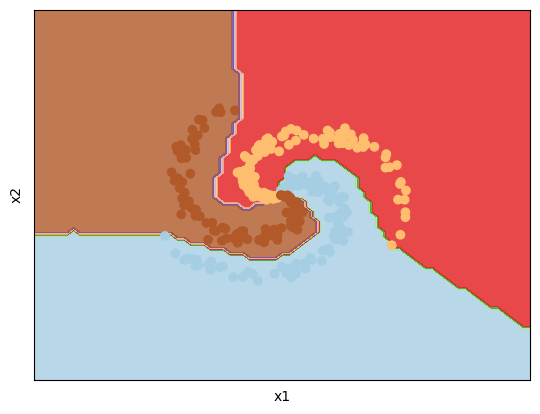

In [28]:
import autograd.numpy as np  # Thinly wrapped version of numpy
from autograd import grad


m  = 100 # size of hidden layer

# initialize weights with small random values and biases with zeros
W1 = np.random.randn(d, m) * 0.01
b1 = np.zeros(m)
W2 = np.random.randn(m, num_classes) * 0.01
b2 = np.zeros(num_classes)

# Select hyperparameters
iters      = 10000
step_size  = 1e-0
lambda_val = 1e-3 # regularization strength

'''
Do entire feed-forward computation and compute loss function
'''
def compute_loss(params):
    W1, b1, W2, b2 = params

    # Compute scores
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    scores = np.dot(A1, W2) + b2

    # Compute probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)   

    # Compute cross-entropy loss    
    logprobs = -np.log(probs[range(n), y])
    loss = np.sum(logprobs) / n    

    # Compute regularization loss
    reg_loss = lambda_val * (np.sum(W1**2) + np.sum(W2**2))  
    return loss + reg_loss


# Compute the gradient (vector of partial derivatives) of the entire feedforward training using grad function 
grad_loss = grad(compute_loss)

# Gradient descent loop
for i in range(iters):
    # Compute the gradients
    grads = grad_loss([W1, b1, W2, b2])

    # Update weights and biases using gradient descent
    W1 -= step_size * grads[0]
    b1 -= step_size * grads[1]
    W2 -= step_size * grads[2]
    b2 -= step_size * grads[3]

    # Print the loss every 1000 iterations
    if (i + 1) % 1000 == 0:
        loss = compute_loss([W1, b1, W2, b2])
        print(f"Iteration {i+1}: Loss = {loss}")
# predict on the test set and plot predictions using plot model

Z1_test = np.dot(X_test, W1) + b1
A1_test = relu(Z1_test)
scores_test = np.dot(A1_test, W2) + b2
probs_test = np.exp(scores_test) / np.sum(np.exp(scores_test), axis=1, keepdims=True)

# Plot the predictions
plot_model(np.argmax(probs_test, axis=1))


##  Train a 2-Layer Neural Network  Using Backprop

Now, we will perform the same training and testing procedure as above but we will code the gradient ourselves using backpropagation. 

### Derivative of Log-Loss with Respect to Scores

Let $S \in \mathbb{R}^{n \times c}$, the matrix of scores for all training points. It is possible to show that:

$$
\frac{dL}{dS_{ik}} = 
\begin{cases}
\frac{1}{n}p_k     & \text{if } y^{(i)} \neq k \\
\frac{1}{n} \left (p_k - 1 \right) & \text{if } y^{(i)} = k
\end{cases}
$$
where $y^{(i)}$ is the true label for training vector $x^{(i)}$. 

Proof can be found https://math.stackexchange.com/questions/1804041/how-to-derive-softmax-function

Computing these derivatives is the first step of backpropagation.

### Backprop through the network Using Matrix Multiplication

You will need to use the equations we established in class (last page) for the derivatives of the loss function with respect to the parameters of the network and use them in place of the automatic derivatives in the gradient descent updates. 


Compare the loss every 1000 iterations and visually compare the prediction map with the ones computed above. What is your expectation?


Iteration 1000: Loss = 0.7675913292245037
Iteration 2000: Loss = 0.545409191616054
Iteration 3000: Loss = 0.5277321661902039
Iteration 4000: Loss = 0.5213378817412162
Iteration 5000: Loss = 0.5185547988032442
Iteration 6000: Loss = 0.5174490816094438
Iteration 7000: Loss = 0.5168601223739151
Iteration 8000: Loss = 0.5191517953587723
Iteration 9000: Loss = 0.5195668034428446
Iteration 10000: Loss = 0.5195338564905619


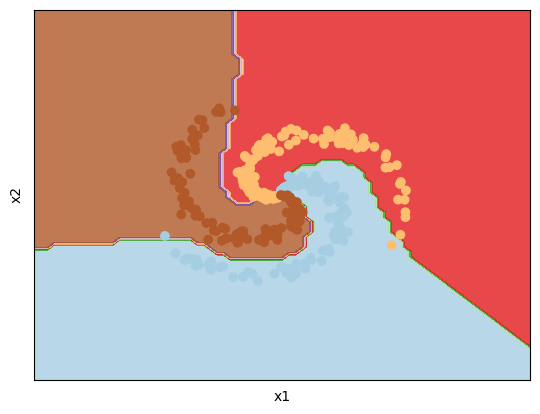

In [19]:
# Initialize parameters as before

m = 100  # size of hidden layer
W1 = np.random.randn(d, m) * 0.01
b1 = np.zeros(m)
W2 = np.random.randn(m, num_classes) * 0.01
b2 = np.zeros(num_classes)

# Select hyperparameters as before
iters = 10000
step_size = 1e-0
lambda_val = 1e-3  # regularization strength

# Select nonlinearity
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient descent loop
for i in range(iters):

    '''
    FORWARD PROPAGATION
    ''' 

    # Compute class scores
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    scores = np.dot(A1, W2) + b2    
    # Compute class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)    

    # Compute the loss function
    logprobs = -np.log(probs[range(n), y])
    data_loss = np.sum(logprobs) / n    

    reg_loss = lambda_val * (np.sum(W1**2) + np.sum(W2**2))
    loss = data_loss + reg_loss

    ''' 
    BACKWARD PROPAGATION
    '''

    # Compute gradient of cross-entropy wrt class scores
    dscores = probs
    dscores[range(n), y] -= 1
    dscores /= n    

    # Now backpropagate to get gradient of cross-entropy wrt parameters (W2,b2)
    # and hidden layer outputs 
    dW2 = np.dot(A1.T, dscores)
    db2 = np.sum(dscores, axis=0)    

    # Backprop through the nonlinearity
    dA1 = np.dot(dscores, W2.T)
    dZ1 = dA1 * (A1 * (1 - A1))   

    # Backprop to (W1,b1)
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0)
    
    # Add regularization gradient contribution
    dW2 += lambda_val * W2
    dW1 += lambda_val * W1   

    '''
    UPDATE PARAMETERS
    '''

    # perform a parameter update
    W1 -= step_size * dW1
    b1 -= step_size * db1
    W2 -= step_size * dW2
    b2 -= step_size * db2
    
    # Print the loss every 1000 iterations
    if (i + 1) % 1000 == 0:
        print(f"Iteration {i+1}: Loss = {loss}")
    
# Compute scores and probabilities for the test set
Z1_test = np.dot(X_test, W1) + b1
A1_test = sigmoid(Z1_test)
scores_test = np.dot(A1_test, W2) + b2
probs_test = np.exp(scores_test) / np.sum(np.exp(scores_test), axis=1, keepdims=True)

# Plot the predictions
plot_model(np.argmax(probs_test, axis=1))
plt.show()

# Train Multi-Class SVC with RBF kernel 

Use the same data to train a 3-class SVM with RBF kernel. Visually compare the prediction map on the test set obtained with plot_model. You can cross_validate over the complexity parameters of the SVM. Are you expecting the SVM to perform similarly to the NN? Why or why not?

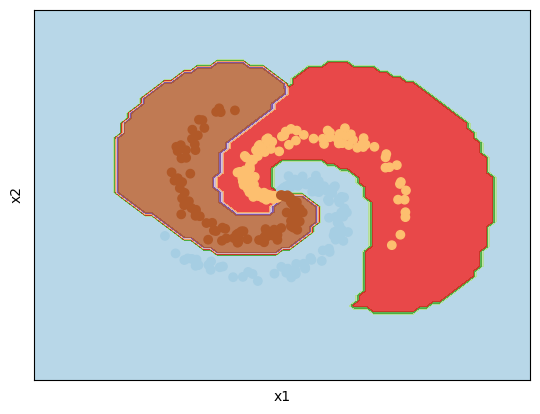

In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Train the SVM with cross-validation to find the best hyperparameters
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
svm = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
svm.fit(X, y)

# Predict on the test set
y_pred_svm = svm.predict(X_test)

# Plot the predictions
plot_model(y_pred_svm)
plt.show()